# Lab 4: Building a CKY recognizer

Written by Liza Sulkin (liza@bu.edu) and Najoung Kim (najoung@bu.edu)

**TODO 0**: Put your name and group members' names here.

Xiang Fu

In [21]:
pip install nltk tabulate

Note: you may need to restart the kernel to use updated packages.


In [71]:
import nltk
import numpy as np
from tabulate import tabulate

## Step 1: Defining the CFG grammar

We will use CFG grammars in Chomsky Normal Form, which consist of rules of the form A $\rightarrow$ BC and A $\rightarrow$ a.

We've written an example grammar `grammar1` that captures a small fragment of English, and a helper function `CNF2list` that converts grammars in string form into a list of tuples (left, list_of_right) --- list_of_right corresponding to all possible expansions delimited by `|`.

In [81]:
grammar1 = """
S -> NP VP
PP -> P NP
NP -> Det N | NP PP | N N | time
VP -> V NP | VP PP | flies
Det -> a | the | her | my | an
N -> kangaroos | pajamas | sandwiches | friends | flies | time | arrow
V -> saw | ate | like | time | flies
P -> in | like
"""

def CNF2list(CNF):
  rules = [rule.strip() for rule in CNF.strip().splitlines()]
  rules_list = []
  for rule in rules:
    left, right = rule.split(' -> ')
    list_right = right.split(' | ')
    list_right_delimited = [tuple(r.split()) for r in list_right]
    rules_list.append((left, list_right_delimited))
  return(rules_list)

print(CNF2list(grammar1))

[('S', [('NP', 'VP')]), ('PP', [('P', 'NP')]), ('NP', [('Det', 'N'), ('NP', 'PP'), ('N', 'N'), ('time',)]), ('VP', [('V', 'NP'), ('VP', 'PP'), ('flies',)]), ('Det', [('a',), ('the',), ('her',), ('my',), ('an',)]), ('N', [('kangaroos',), ('pajamas',), ('sandwiches',), ('friends',), ('flies',), ('time',), ('arrow',)]), ('V', [('saw',), ('ate',), ('like',), ('time',), ('flies',)]), ('P', [('in',), ('like',)])]


## Step 2: CKY parsing algorithm

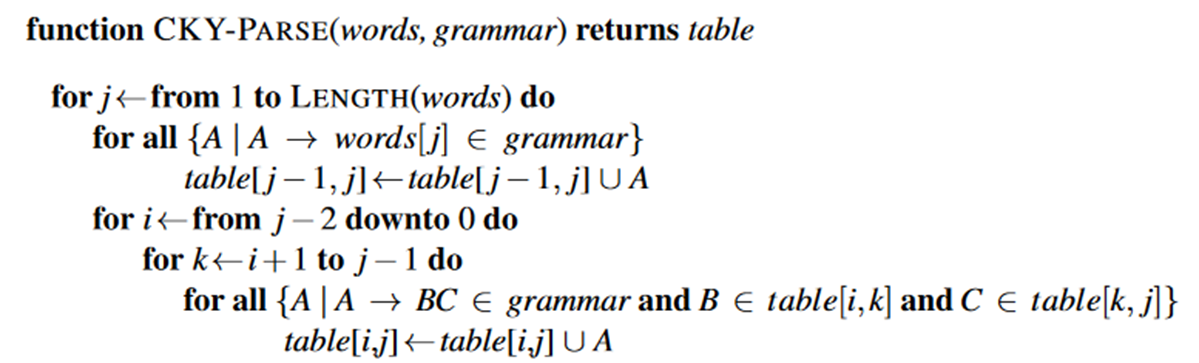
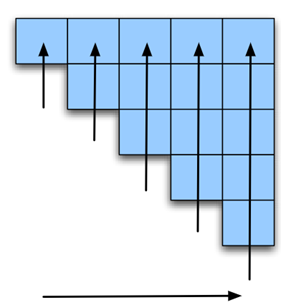

**TODO 1:** Fill in the rest of the `parse` function based on the pseudocode above. The indexing in the pseudocode can be pretty confusing, so I recommend using the visualization above and the `pretty_print` of the table instead of just relying on the indices in the pseudocode. `words` should be a list of strings (e.g., \["I", "like", "cats"\]), and `grammar` should be the string representation of the grammar, like `grammar1`.

In [78]:
def pretty_print(table, sent):
    print(tabulate(table, headers=sent))

def parser(words, grammar):
    rules = CNF2list(grammar)
    n = len(words)
    table = [[[] for _ in range(n+1)] for _ in range(n+1)]
    grammar_dict = {}

    for left, right_list in rules:
        for right in right_list:
            grammar_dict.setdefault(right, []).append(left)

    # Fill in the lexical items, accounting for ambiguity
    for j in range(1, n+1):
        word = (words[j-1],)
        if word in grammar_dict:
            table[j-1][j] = grammar_dict[word]

    # Main CKY loop
    for i in reversed(range(n)):  # i goes from n-1 down to 0
        for j in range(i+2, n+1):  # j goes from i+2 up to n
            for k in range(i+1, j):  # k goes from i+1 up to j-1
                for B in table[i][k]:
                    for C in table[k][j]:
                        if (B, C) in grammar_dict:
                            table[i][j].extend([A for A in grammar_dict[(B, C)] if A not in table[i][j]])

    # Check for recognition
    recognized = 'S' in table[0][n]
    return table, recognized


**TODO 2**: Test your parser function by running the code below. If you implemented things correctly, you'll end up with something like: 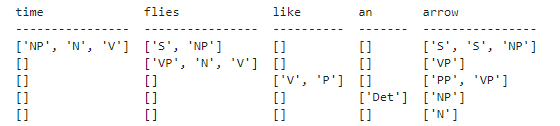

for "time flies like an arrow".

In [79]:
sents = [
    'time flies like an arrow',
    'arrow flies like a time',
    'like time an arrow flies',
    'the kangaroos ate the sandwiches in my pajamas',
    'the kangaroos ate in my pajamas the sandwiches',
]

for sent in sents:
    table, recognized = parser(sent.split(' '), grammar1)
    pretty_print(table, sent.split())
    print(recognized)
    print()


    time              flies             like        an       arrow
--  ----------------  ----------------  ----------  -------  ------------
[]  ['NP', 'N', 'V']  ['S', 'NP']       []          []       ['S', 'NP']
[]  []                ['VP', 'N', 'V']  []          []       ['VP']
[]  []                []                ['V', 'P']  []       ['VP', 'PP']
[]  []                []                []          ['Det']  ['NP']
[]  []                []                []          []       ['N']
[]  []                []                []          []       []
True

    arrow    flies             like        a        time
--  -------  ----------------  ----------  -------  ----------------
[]  ['N']    ['NP']            []          []       ['S', 'NP']
[]  []       ['VP', 'N', 'V']  []          []       ['VP']
[]  []       []                ['V', 'P']  []       ['VP', 'PP']
[]  []       []                []          ['Det']  ['NP']
[]  []       []                []          []       ['NP', 'N', 'V

## Step 3: Recognition

**TODO 3:** But your parser isn't a recognizer yet! It doesn't give you True/False based on whether your sentence is recognizable given the grammar. Modify the `parser` function above so it returns a tuple `(table, recognized)`, where `recognized` is a Boolean value that is True if the input is recognizable and False if not.

**TODO 4:** Verify that you get `True, True, False, True, False` for running the parser on each of the five sentences in `sents`.  Remember to run the definition cell again before running the cell below!

In [80]:
for sent in sents:
    table, recognized = parser(sent.split(' '), grammar1)
    pretty_print(table, sent.split())
    print(recognized)
    print()

    time              flies             like        an       arrow
--  ----------------  ----------------  ----------  -------  ------------
[]  ['NP', 'N', 'V']  ['S', 'NP']       []          []       ['S', 'NP']
[]  []                ['VP', 'N', 'V']  []          []       ['VP']
[]  []                []                ['V', 'P']  []       ['VP', 'PP']
[]  []                []                []          ['Det']  ['NP']
[]  []                []                []          []       ['N']
[]  []                []                []          []       []
True

    arrow    flies             like        a        time
--  -------  ----------------  ----------  -------  ----------------
[]  ['N']    ['NP']            []          []       ['S', 'NP']
[]  []       ['VP', 'N', 'V']  []          []       ['VP']
[]  []       []                ['V', 'P']  []       ['VP', 'PP']
[]  []       []                []          ['Det']  ['NP']
[]  []       []                []          []       ['NP', 'N', 'V